Business Hypothesis Testing

You are working as a data scientist for a bank. You are provided with historical data from the management of the bank and are asked to try to formulate a hypothesis between employment status and the propensity to buy term deposits.

Defining the hypothesis: With respect to employment status, let's arrive at a hypothesis that "high paying employees prefer term deposits more than other categories of employees."

In [39]:
import pandas as pd
import altair as alt

file_url = r'https://raw.githubusercontent.com/sedeba19/Chapter-3/main/data/bank-full.csv'
df_bank = pd.read_csv(file_url,
                        sep = ';')

In [2]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df_bank.shape

(45211, 17)

In [4]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df_bank.duplicated().sum()

0

In [6]:
# Get the total counts under each job category
job_total = df_bank.groupby('job')['y'].agg(job_total = 'count').reset_index()
job_total

,job,job_total
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [7]:
# Find the propensity class totals for each employment status
job_propensity = df_bank.groupby(['job', 'y'])['y'].agg(job_category = 'count').reset_index()
job_propensity

,job,y,job_category
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [8]:
job_total.shape

(12, 2)

In [9]:
job_propensity.shape

(24, 3)

In [10]:
# Merge both dataframes
jobComb = pd.merge(job_total,
                   job_propensity,
                   on= ['job'])
jobComb

,job,job_total,y,job_category
0,admin.,5171,no,4540
1,admin.,5171,yes,631
2,blue-collar,9732,no,9024
3,blue-collar,9732,yes,708
4,entrepreneur,1487,no,1364
5,entrepreneur,1487,yes,123
6,housemaid,1240,no,1131
7,housemaid,1240,yes,109
8,management,9458,no,8157
9,management,9458,yes,1301


In [11]:
jobComb['catPropensity'] = (jobComb['job_category']/jobComb['job_total'])*100
jobComb

,job,job_total,y,job_category,catPropensity
0,admin.,5171,no,4540,87.797331
1,admin.,5171,yes,631,12.202669
2,blue-collar,9732,no,9024,92.725031
3,blue-collar,9732,yes,708,7.274969
4,entrepreneur,1487,no,1364,91.728312
5,entrepreneur,1487,yes,123,8.271688
6,housemaid,1240,no,1131,91.209677
7,housemaid,1240,yes,109,8.790323
8,management,9458,no,8157,86.244449
9,management,9458,yes,1301,13.755551


In [12]:
# Print the maximum value of the catPropensity column
print("The maximum value of jobComb['catPropensity'] is: {}".format(jobComb['catPropensity'].max()))

The maximum value of jobComb['catPropensity'] is: 92.72503082614057


In [13]:
# Print the minimum value of the catPropensity column
print("The minimum value of jobComb['catPropensity'] is :{}".format(jobComb['catPropensity'].min()))

The minimum value of jobComb['catPropensity'] is :7.274969173859433


In [35]:
# Visualize the data
import matplotlib.pyplot as plt
import numpy as np

jobCombYes = jobComb[jobComb['y'] == 'yes']
jobCombNo = jobComb[jobComb['y'] == 'no']

xlabels = jobComb['job'].nunique()

# Get the proportion values
jobYes = jobCombYes['catPropensity'].unique()
jobNo = jobCombNo['catPropensity'].unique()

In [36]:
jobYes

array([12.20266873,  7.27496917,  8.27168796,  8.79032258, 13.75555086,
       22.79151943, 11.84293857,  8.88300433, 28.67803838, 11.05699618,
       15.50268611, 11.80555556])

In [37]:
jobNo

array([87.79733127, 92.72503083, 91.72831204, 91.20967742, 86.24444914,
       77.20848057, 88.15706143, 91.11699567, 71.32196162, 88.94300382,
       84.49731389, 88.19444444])

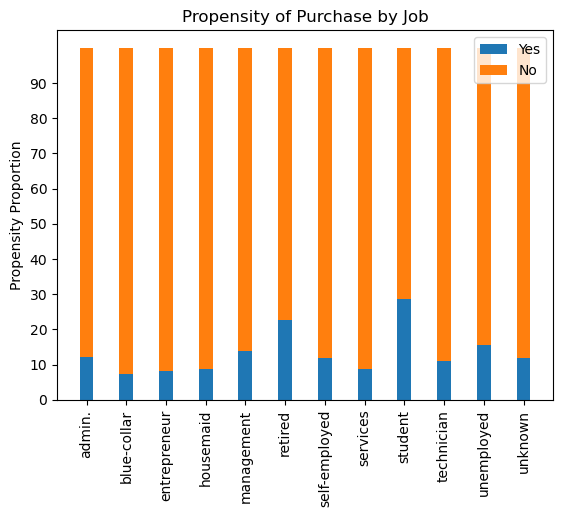

In [38]:
# Arrange the indexes of the x axis
ind = np.arange(xlabels)

# Get the width of each bar
width = 0.35
# Make plot
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom = jobYes)
plt.ylabel('Propensity Proportion')
plt.title('Propensity of Purchase by Job')

plt.xticks(ind, job_total['job'].unique())
plt.yticks(np.arange(0, 100, 10))

plt.legend((p1[0], p2[0]), ('Yes', 'No'))
plt.xticks(rotation = 90)
plt.show()

We stated that individuals with higher incomes are more likely to buy term deposits. However, we have found out that students and retired individuals have a higher propensity for term deposits.